In [1]:
%matplotlib inline
from commonmethods.utility_methods import natural_keys
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import medfilt
from common_classes import SSPFMSignal, EFPFMSignal
from scipy.optimize import leastsq
from itertools import chain
from SSPFM.sspfm import HysteresisProcessor

C:\Users\ru\Documents\git\spm_data_analysis\common_classes\plotter.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\ru\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ru\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ru\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ru\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\ru\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\ru\An

In [2]:
def read_floats(filename):
    with open(filename) as f:
        return np.array(list(map(float, f.read().split())))

121 61


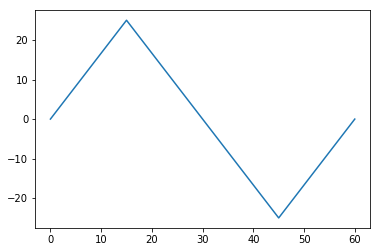

In [3]:
main_vdc = SSPFMSignal(steps_per_grows=15,
                       points_per_step=4,
                       points_per_zero=4,
                       number_of_cycles=2,
                       amp_start=25,
                       amp_end=25,
                       bipolar=1,
                       replace_zeros=False)
#plt.plot(list(chain.from_iterable([main_vdc.voltage[slice_i] for slice_i in main_vdc.zeros_indices])), color='red')
plt.plot(main_vdc.step_values[:main_vdc.steps_per_cycle()])
#plt.plot(main_vdc.voltage)
print(len(main_vdc.step_values), main_vdc.steps_per_cycle())

In [4]:
root = r"C:\Users\ru\Documents\git\spm_data_analysis\computation_results\15062018"
steps = os.path.join(root, 'steps', 'vals')
steps_amp = os.path.join(steps, 'Amax')
steps_phase = os.path.join(steps, 'phase')
cycle_ind = 0
if main_vdc.number_of_cycles == 1:
    steps_amp_files = [os.path.join(steps_amp, filepath)
                       for filepath in sorted(os.listdir(steps_amp), key=natural_keys)]
    steps_phase_files = [os.path.join(steps_phase, filepath)
                         for filepath in sorted(os.listdir(steps_phase), key=natural_keys)]
else:
    steps_amp_files = [os.path.join(
        steps_amp,
        dir_name,
        os.listdir(os.path.join(steps_amp, dir_name))[cycle_ind])
                       for dir_name in sorted(os.listdir(steps_amp), key=natural_keys)]
    steps_phase_files = [os.path.join(
        steps_phase,
        dir_name,
        os.listdir(os.path.join(steps_phase, dir_name))[cycle_ind])
                         for dir_name in sorted(os.listdir(steps_phase), key=natural_keys)]

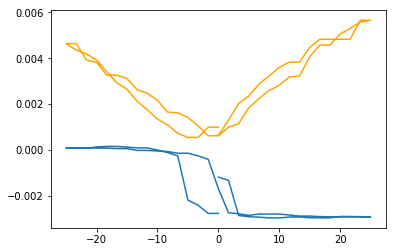

In [5]:
index = 841 # clockwise (first lower part, then upper)
#index = 863 # counter_clockwise
#index = 2 #trash
amp = read_floats(steps_amp_files[index])
phase = read_floats(steps_phase_files[index])
inp = [medfilt(x, 3) for x in [amp, phase]]
#inp = [amp, phase]
cycle_vdc = np.array(main_vdc.step_values[main_vdc.get_cycle_step_indices(cycle_ind)])
plt.plot(cycle_vdc, inp[0], color='orange')
plt.plot(cycle_vdc, inp[1] / 1000)
#plt.plot(cycle_vdc[len(inp[1])//2:], inp[1][len(inp[1])//2:] / 1000)

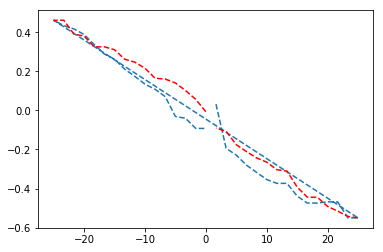

In [6]:
hyst_p = HysteresisProcessor(cycle_vdc)
r_plus, r_minus = hyst_p.r_plus_indices, hyst_p.r_minus_indices
half_len = len(r_minus) // 2
response = hyst_p.response_from_amp_and_phase(*inp)
#response = inp[1]
plt.plot(cycle_vdc[r_plus], response[r_plus]*100, linestyle='--')
plt.plot(cycle_vdc[r_minus][:half_len], response[r_minus][:half_len]*100, linestyle='--', color='red')
plt.plot(cycle_vdc[r_minus][half_len:], response[r_minus][half_len:]*100, linestyle='--', color='red')

In [9]:
parameters = hyst_p.process_loop(response)
print(parameters)

31 31
{'R_init': 0.00024233109853593005, 'R_0_plus': -6.7142338463224409e-05, 'R_0_minus': -0.00092390160792516396, 'V_minus': -25.0, 'V_plus': 25.0, 'A_s': -0.01122516724704301, 'Im': -1.1821567729178319, 'R_s_plus': -0.0049777289349815486, 'R_s_minus': 0.0040387979549010387}


In [8]:
print(parameters)

{'R_init': 0.00024233109853593005, 'R_0_plus': -6.7142338463224409e-05, 'R_0_minus': -0.00092390160792516396, 'V_minus': -25.0, 'V_plus': 25.0, 'A_s': 0.01122516724704301, 'Im': -1.1821567729178333, 'R_s_plus': -0.0049845292858854374, 'R_s_minus': 0.0040764333312977375}
